# Udacity Capstone Project - Costa Rican Household Poverty Prediction

### Introduction

### Data Exploration

In [1]:
# Import libraries required for data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Pretty display for notebooks
%matplotlib inline

# load the data
data = pd.read_csv("train.csv")

# Display the shape of the data
print ("Total rows*columns of the dataset: ", data.shape)

# The number of columns is high, we need to adjust the display (we sometimes display the columns as rows
# so I adjusted both parameters)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Display a sample of it
display(data.head(n=5))

Total rows*columns of the dataset:  (9557, 143)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [2]:
# Show the data types of the columns
print(data.dtypes)

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
pisomoscer           int64
pisocemento          int64
pisoother            int64
pisonatur            int64
pisonotiene          int64
pisomadera           int64
t

In [3]:
# Get basic statistics of the data set, excluding object columns
data.describe(exclude = [ 'object'])

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

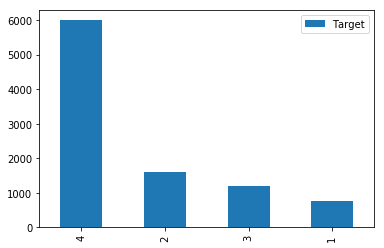

In [4]:
# Let's check how the data distribution is by the target

target = data['Target'].value_counts().to_frame()
_  = target.plot(kind = 'bar')

Just by an initial look at the data, there seems to be several issues that needs to be addressed:
1. The target variable is unbalanced, as there are much more families targeted as Non-Vulnerable (4) compared to the other possible values.
2. Some of the columns are redundant (the SQB_xxx ones, the male\female columns) and should be removed
3. Some columns have missing values (e.g. rezesq, v18q1, v2a1) that should be handled
4. Some columns have mixed value types, and as a result, are described as type 'object'. For example, the 'dependency' column has in the sample data the following values: 'Yes', 'No' and '8'. Clearly this should be fixed.

Also note that the data contains rows for the head of the household as well as for the other inhabitants of the household. In this competition\analysis, we only need to address to the HEAD of the household (and of course verify that all such rows have a target value). This will be addressed below.

### Data Preparation

As denoted above, before starting to apply ML algorithms, we need to prepare the data firsthand. I am starting by dealing with the column types marked as 'object'

In [5]:
data.select_dtypes('object').head(n=5)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


The "Id" and "idhogar" are indeed string values that represent IDs (the first one is the ID of the person, the 2nd one is the ID of the household). But the dependency, edjefe and edjefa columns should have numerical values.

Recap of the definition of those columns:

**dependency**: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

**edjefe**: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

**edjefa**: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

Which means we can replace the 'Yes' and 'No' values with 1 and 0 respectively

In [6]:
mapping = {"yes": 1, "no": 0}

data['dependency'] = data['dependency'].replace(mapping).astype(np.float64)
data['edjefa'] = data['edjefa'].replace(mapping).astype(np.float64)
data['edjefe'] = data['edjefe'].replace(mapping).astype(np.float64)

data[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


Need to verify that all household entries have a head. according to the Kaggle competition, any entries without a head should be removed as their label cannot be resolved.

In [21]:
# group by the household and count all the entries that have a head (parentesco1 == 1)
households_leader = data.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = data.loc[data['idhogar'].isin(households_leader[households_leader == 0].index), :]
households_no_head = households_no_head['idhogar'].unique()

print('Number of households without a head is {}'.format(len(households_no_head)))

Number of households without a head is 15


We should remove the entries that have no household head:

In [22]:
data = data[~data['idhogar'].isin(households_no_head)]
print ("Total rows*columns of the dataset after removing headless household entries: ", data.shape)

Total rows*columns of the dataset after removing headless household entries:  (9534, 143)


The next step would be to check which columns have missing values and how to handle those cases:

In [28]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total missing'})

# Drop the columns that have no missing values
missing = missing[missing['total missing']>0]

missing.sort_values('total missing', ascending = False)

,total missing
rez_esc,7921
v18q1,7319
v2a1,6843
meaneduc,5
SQBmeaned,5


It makes sense that meaneduc and SQBmeaned have identical missing values, since the 2nd feature is the square value of the 1st one. Also note that the number is relatively small (5). But for **v18q1**, **v2a1** and **rez_esc** the number of missing values is very high.

In [36]:
# rez_esc is years behind in school, and according to the discussions in the competition (and real life...), this is 
# relevant only for people in the age 7 to 19, so for other people we can set this to 0. Also the maximum value for this feature
# is 5, so we will update it here as well.

data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

# Let's see if there is any correlation between rez_esc and other "education related" columns:
data.loc[data['rez_esc'].isnull(), ['age', 'escolari', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 
                                    'instlevel7', 'instlevel8', 'instlevel9']].head(10)

,age,escolari,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
11,18,12,0,0,0,0,0,0,1,0,0
15,19,11,0,0,0,0,1,0,0,0,0
17,19,11,0,0,0,0,1,0,0,0,0
35,19,0,1,0,0,0,0,0,0,0,0
111,18,7,0,0,0,1,0,0,0,0,0
144,18,6,0,0,1,0,0,0,0,0,0
181,19,11,0,0,0,0,1,0,0,0,0
259,19,11,0,0,0,0,1,0,0,0,0
272,19,11,0,0,0,0,0,1,0,0,0
279,19,7,0,0,0,1,0,0,0,0,0


In [52]:
# we can assume that in cases the cases above, we can use all the cases where escolari value is <= 12 to calculate
# the number of years behind in school as 12 - escolari (and again apply the 5 limit value)

data['12-escolari'] = 12 - data['escolari']
data.loc[data['12-escolari'] > 5, '12-escolari'] = 5
data.loc[data['12-escolari'] < 0, '12-escolari'] = 0
data.loc[data['rez_esc'].isnull() & data['escolari']<12, 'rez_esc'] = data['12-escolari']

data['rez_esc'].describe()

,total missing
v18q1,7319
v2a1,6843
meaneduc,5
SQBmeaned,5


Continuing to v18q1, we are now seeing that this value indicates the number of tablets the family owns.
We have a boolean feature called v18q, which indicates whether the family has a tablet or not. We can try to see if from that we can resolve the missing values:

In [54]:
data.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    7319
1       0
Name: v18q1, dtype: int64

In [56]:
# So we can fill in the missing values with zeros, since it's exact match to the families that have no tablet at all
data['v18q1'] = data['v18q1'].fillna(0)

,total missing
v2a1,6843
meaneduc,5
SQBmeaned,5


Next on the list is the **v2a1** feature, which indicates the monthly rent payment.
We can use the **tipovivi_xxx** features to verify that maybe this feature can be set to 0, in case rental is not relevant (e.g. the household owns the house)

In [58]:
owner_column_names = [x for x in data if x.startswith('tipovivi')]

# check ownership variables values for home missing rent payments
data.loc[data['v2a1'].isnull(), owner_column_names].sum()

tipovivi1    5897
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     783
dtype: int64

In [61]:
# So the above sums up exactly to 6843, which means we can safely set the value to 0 where missing, since tipovivi1, tipovivi4
# and tipovivi5 all account for cases where the house is NOT rented.

data.loc[:, 'v2a1'].fillna(0, inplace=True)

,total missing
meaneduc,5
SQBmeaned,5


The last feature to handle is the meaneduc, which is defined as **average years of education for adults**. So we should check if those specific rows have missing values because these people did not go to school or their age is too young:

In [72]:
data.loc[data['meaneduc'].isnull(), ['escolari', 'age', 'idhogar', 'parentesco1']]

,escolari,age,idhogar,parentesco1
1291,10,18,1b31fd159,1
1840,6,18,a874b7ce7,0
1841,4,18,a874b7ce7,1
2049,12,19,faaebf71a,1
2050,12,19,faaebf71a,0


The age and years in school seems to be fine, but we do see that in all cases these are very young people.
Let's check if they live with other adults in their houses:

In [76]:
data.loc[data['idhogar'].isin(['1b31fd159', 'a874b7ce7', 'faaebf71a'])]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,12-escolari
1291,ID_bd8e11b0f,0.0,0,7,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,10,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1b31fd159,1,0,0,1,8.0,0.0,10.0,NaN,0,0,0,1,0,0,0,0,0,5,0.2,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,18,100,324,1,0,1,0.04,64.0,NaN,324,4,2
1840,ID_46ff87316,110000.0,0,1,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,6,5,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8.0,4.0,0.0,NaN,0,0,1,0,0,0,0,0,0,1,2.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,36,324,4,16,4,4.00,64.0,NaN,324,4,5
1841,ID_69f50bf3e,110000.0,0,1,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,4,5,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8.0,4.0,0.0,NaN,0,1,0,0,0,0,0,0,0,1,2.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,16,324,4,16,4,4.00,64.0,NaN,324,4,5
2049,ID_db3168f9f,180000.0,0,3,0,1,1,0,0.0,0,2,2,0,0,0,0,2,2,2,2,12,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,faaebf71a,2,0,0,2,8.0,12.0,0.0,NaN,0,0,0,0,0,0,1,0,0,2,1.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.00,64.0,NaN,361,4,0
2050,ID_2a7615902,180000.0,0,3,0,1,1,0,0.0,0,2,2,0,0,0,0,2,2,2,2,12,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,faaebf71a,2,0,0,2,8.0,12.0,0.0,NaN,0,0,0,0,0,0,1,0,0,2,1.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.00,64.0,NaN,361,4,0


In [79]:
# So it appears these are very young people living on their own. We can assume they did not go to school and set the mean
# education to 0.

data.loc[:, 'meaneduc'].fillna(0, inplace=True)
data.loc[:, 'SQBmeaned'].fillna(0, inplace=True)

#### Feature Removal 

We can drop all the columns that are redundant:
Id (unique ID)
idhogar (unique ID)
12-escolari (synthetic column I created for imputation of rez_esc)
square value columns (redundant because original columns exist)
male (redundant. female column exists)
and any other features which are highly correlated.

In [93]:
# definitions based on https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

from collections import Counter

id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

synthetic = ['12-escolari']

x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_ + synthetic

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])



There are no repeats:  True
We covered every variable:  True


In [94]:
# drop square variables and synthetic variables

data = data.drop(columns = sqr_ + synthetic)
data.shape

(9534, 134)

In the Kaggle competition, the predictions (score) would be only on the rows of the households, so we need to extracta from the data only the rows that represent households. We should also check that their Target distribution is similar to that of the original data.

We'll add to those entries the aggregations of the other household members later.

##### Household data 

In [112]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
print ("Total rows*columns of the heads: ", heads.shape)

Total rows*columns of the heads:  (2973, 98)


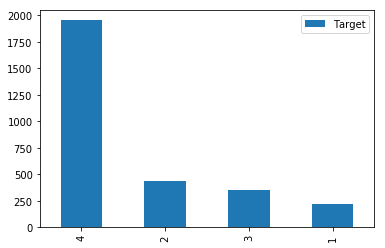

In [113]:
target = heads['Target'].value_counts().to_frame()
_  = target.plot(kind = 'bar')

In [114]:
# find and drop correlated features.
# based on https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = heads.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

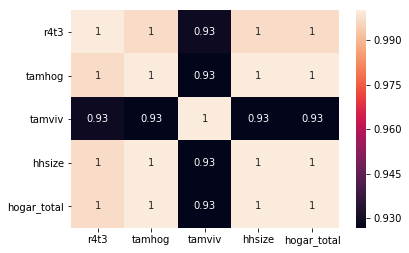

In [110]:
import seaborn as sb

sb.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True);

If we look at the description of the columns given in Kaggle, this makes sense:
r4t3 = Total persons in the household
tamhog = size of the household
tamviv = number of persons living in the household
hhsize = household size
hogar_total = of total individuals in the household

So some of the features have perfect correlation: r4t3, hogar_total, hhsize and tamhog.
However, tamviv may be slightly different compared to these 4 features, because there could be other people living in the house
which are not family members. So i will keep tamviv and tamhog.

In [115]:
heads = heads.drop(columns = ['hhsize', 'hogar_total', 'r4t3'])

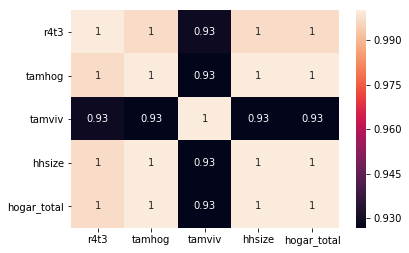

In [116]:
sb.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True);

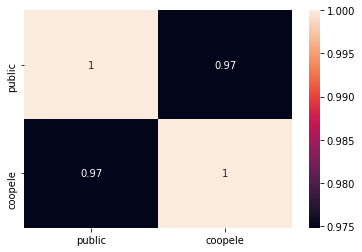

In [117]:
sb.heatmap(corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9],
            annot=True);

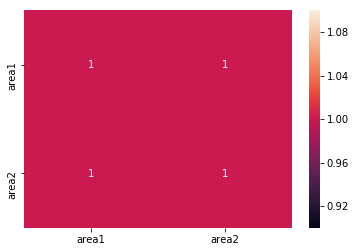

In [118]:
sb.heatmap(corr_matrix.loc[corr_matrix['area2'].abs() > 0.9, corr_matrix['area2'].abs() > 0.9],
            annot=True);

So 'coopele' and 'public' are highly correlated, which also makes sense (since public electricity is usually a cooperative), so i will drop public.

In addition, area1 and area2 are exactly opposites (rural or urban location), so i will drop area2.

In [119]:
heads = heads.drop(columns = ['public', 'area2'])

##### Individual data

In [120]:
individuals = data[id_ + ind_bool + ind_ordered]
individuals.shape

(9534, 39)

In [121]:
# Create correlation matrix
corr_matrix = individuals.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

to_drop

['female']

I actually observed this before just by reading the column descriptions... There is both 'male' and 'female' columns, so we can remove the 'male' column altogether.

In [122]:
individuals = individuals.drop(columns = 'male')

In [130]:
# looking at a sample of individuals of a specific household
individuals.loc[individuals['idhogar'] == '003123ec2']

,Id,idhogar,Target,v18q,dis,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,mobilephone,rez_esc,escolari,age
8159,ID_55199c2f3,003123ec2,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5,7,23
8160,ID_5bef9b553,003123ec2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,6,24
8161,ID_079963679,003123ec2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,5,0,1
8162,ID_99c9bcea5,003123ec2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,5,0,3


In [131]:
# display the complete column names list for the individual records
list(individuals)

['Id',
 'idhogar',
 'Target',
 'v18q',
 'dis',
 'female',
 'estadocivil1',
 'estadocivil2',
 'estadocivil3',
 'estadocivil4',
 'estadocivil5',
 'estadocivil6',
 'estadocivil7',
 'parentesco1',
 'parentesco2',
 'parentesco3',
 'parentesco4',
 'parentesco5',
 'parentesco6',
 'parentesco7',
 'parentesco8',
 'parentesco9',
 'parentesco10',
 'parentesco11',
 'parentesco12',
 'instlevel1',
 'instlevel2',
 'instlevel3',
 'instlevel4',
 'instlevel5',
 'instlevel6',
 'instlevel7',
 'instlevel8',
 'instlevel9',
 'mobilephone',
 'rez_esc',
 'escolari',
 'age']

Now in order to aggregate, I need to make up the relevant aggregation functions for each type of column values:
For boolean (0 or 1) values, the **sum** function would be best used.
For continous features (**rez_esc**, **escolary** and **age**) using **mean**, **min** and **max**.

Note that std will NOT be used, because for households with 1 row (person), pandas std will return NaN value
(There are 388 such cases in the dataset).

See more information at: https://stackoverflow.com/questions/50306914/pandas-groupby-agg-std-nan

In [150]:
# Group and aggregate

aggregations = {"v18q": {"v18q_sum": "sum"},
                "dis": {"dis_sum": "sum"},
                "female": {"female_sum": "sum"},
                "estadocivil1": {"estadocivil1_sum": "sum"},
                "estadocivil2": {"estadocivil2_sum": "sum"},
                "estadocivil3": {"estadocivil3_sum": "sum"},
                "estadocivil4": {"estadocivil4_sum": "sum"},
                "estadocivil5": {"estadocivil5_sum": "sum"},
                "estadocivil6": {"estadocivil6_sum": "sum"},
                "estadocivil7": {"estadocivil7_sum": "sum"},
                "parentesco1": {"parentesco1_sum": "sum"},
                "parentesco2": {"parentesco2_sum": "sum"},
                "parentesco3": {"parentesco3_sum": "sum"},
                "parentesco4": {"parentesco4_sum": "sum"},
                "parentesco5": {"parentesco5_sum": "sum"},
                "parentesco6": {"parentesco6_sum": "sum"},
                "parentesco7": {"parentesco7_sum": "sum"},
                "parentesco8": {"parentesco8_sum": "sum"},
                "parentesco9": {"parentesco9_sum": "sum"},
                "parentesco10": {"parentesco10_sum": "sum"},
                "parentesco11": {"parentesco11_sum": "sum"},
                "parentesco12": {"parentesco12_sum": "sum"},
                "instlevel1": {"instlevel1_sum": "sum"},
                "instlevel2": {"instlevel2_sum": "sum"},
                "instlevel3": {"instlevel3_sum": "sum"},
                "instlevel4": {"instlevel4_sum": "sum"},
                "instlevel5": {"instlevel5_sum": "sum"},
                "instlevel6": {"instlevel6_sum": "sum"},
                "instlevel7": {"instlevel7_sum": "sum"},
                "instlevel8": {"instlevel8_sum": "sum"},
                "instlevel9": {"instlevel9_sum": "sum"},
                "mobilephone": {"mobilephone_sum": "sum"},
                "rez_esc": {"rez_esc_mean": "mean", "rez_esc_min" : "min", "rez_esc_max" : "max"},
                "escolari": {"escolari_mean": "mean", "escolari_min" : "min", "escolari_max" : "max"},
                "age": {"age_mean": "mean", "age_min" : "min", "age_max" : "max"},
               }

individuals_aggregated = individuals.drop(columns = 'Target').groupby('idhogar').agg(aggregations)
individuals_aggregated.columns = individuals_aggregated.columns.droplevel(0)
individuals_aggregated.head()

,v18q_sum,dis_sum,female_sum,estadocivil1_sum,estadocivil2_sum,estadocivil3_sum,estadocivil4_sum,estadocivil5_sum,estadocivil6_sum,estadocivil7_sum,parentesco1_sum,parentesco2_sum,parentesco3_sum,parentesco4_sum,parentesco5_sum,parentesco6_sum,parentesco7_sum,parentesco8_sum,parentesco9_sum,parentesco10_sum,parentesco11_sum,parentesco12_sum,instlevel1_sum,instlevel2_sum,instlevel3_sum,instlevel4_sum,instlevel5_sum,instlevel6_sum,instlevel7_sum,instlevel8_sum,instlevel9_sum,mobilephone_sum,rez_esc_mean,rez_esc_min,rez_esc_max,escolari_mean,escolari_min,escolari_max,age_mean,age_min,age_max
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001ff74ca,2,0,2,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,2.5,0,5,8.000000,0,16,19.000000,0,38
003123ec2,0,0,1,2,2,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,4,5.0,5,5,3.250000,0,7,12.750000,1,24
004616164,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,3.0,1,5,7.000000,3,11,33.000000,16,50
004983866,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,4.5,4,5,7.500000,7,8,37.500000,16,59
005905417,0,0,1,1,0,0,0,1,0,1,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,3,4.0,3,5,5.666667,0,9,17.333333,6,32


In [179]:
# now merge it back to the heads for the final input
# Merge on the household id
classfier_input = heads.merge(individuals_aggregated, on = 'idhogar', how = 'left')

# remove ID columns

classfier_input = classfier_input.drop(columns = ['Id', 'idhogar'])
print('Classifier input Rows*Columns:', classfier_input.shape)

Classifier input Rows*Columns: (2973, 132)


In [180]:
classfier_input.head()

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,v18q1,tamhog,tamviv,hogar_nin,hogar_adul,hogar_mayor,bedrooms,qmobilephone,v18q_sum,dis_sum,female_sum,estadocivil1_sum,estadocivil2_sum,estadocivil3_sum,estadocivil4_sum,estadocivil5_sum,estadocivil6_sum,estadocivil7_sum,parentesco1_sum,parentesco2_sum,parentesco3_sum,parentesco4_sum,parentesco5_sum,parentesco6_sum,parentesco7_sum,parentesco8_sum,parentesco9_sum,parentesco10_sum,parentesco11_sum,parentesco12_sum,instlevel1_sum,instlevel2_sum,instlevel3_sum,instlevel4_sum,instlevel5_sum,instlevel6_sum,instlevel7_sum,instlevel8_sum,instlevel9_sum,mobilephone_sum,rez_esc_mean,rez_esc_min,rez_esc_max,escolari_mean,escolari_min,escolari_max,age_mean,age_min,age_max
0,4,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,190000.0,0.0,10.0,0.0,10.0,1.000000,3,0,1,1,0,0,0,0,1,0.0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2.0,2,2,10.00,10,10,43.0,43,43
1,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,135000.0,8.0,12.0,0.0,12.0,1.000000,4,0,1,1,0,0,0,0,1,1.0,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0,0,12.00,12,12,67.0,67,67
2,4,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,8.0,0.0,11.0,11.0,0.500000,8,0,0,0,0,1,1,0,1,0.0,1,1,0,1,1,2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,1,1,11.00,11,11,92.0,92,92
3,4,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,180000.0,1.0,11.0,0.0,11.0,1.333333,5,0,2,2,1,1,2,1,3,1.0,4,4,2,2,0,3,3,4,0,2,1,2,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,4,2.5,1,5,8.25,2,11,25.0,8,38
4,4,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,130000.0,1.0,9.0,0.0,10.0,4.000000,2,0,1,1,2,1,3,2,2,0.0,4,4,2,2,0,1,1,0,0,3,1,2,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,4,3.5,1,5,5.75,0,11,19.0,7,30


In [181]:
classfier_input.describe()

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,v18q1,tamhog,tamviv,hogar_nin,hogar_adul,hogar_mayor,bedrooms,qmobilephone,v18q_sum,dis_sum,female_sum,estadocivil1_sum,estadocivil2_sum,estadocivil3_sum,estadocivil4_sum,estadocivil5_sum,estadocivil6_sum,estadocivil7_sum,parentesco1_sum,parentesco2_sum,parentesco3_sum,parentesco4_sum,parentesco5_sum,parentesco6_sum,parentesco7_sum,parentesco8_sum,parentesco9_sum,parentesco10_sum,parentesco11_sum,parentesco12_sum,instlevel1_sum,instlevel2_sum,instlevel3_sum,instlevel4_sum,instlevel5_sum,instlevel6_sum,instlevel7_sum,instlevel8_sum,instlevel9_sum,mobilephone_sum,rez_esc_mean,rez_esc_min,rez_esc_max,escolari_mean,escolari_min,escolari_max,age_mean,age_min,age_max
count,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.0,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.0,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.00000,2973.000000,2973.00000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,3.359233,0.021191,0.012109,0.994282,0.952573,0.603431,0.077699,0.183317,0.212916,0.008409,0.114026,0.010091,0.001682,0.001345,0.706694,0.000673,0.001009,0.012782,0.065927,0.966700,0.021527,0.003027,0.002355,0.691557,0.967373,0.028927,0.003700,0.000673,0.003027,0.108644,0.005045,0.225025,0.754457,0.013118,0.002355,0.005045,0.504541,0.443996,0.046418,0.884628,0.030272,0.082408,0.001345,0.0,0.001345,0.102254,0.309788,0.587958,0.131853,0.279516,0.588631,0.095863,0.248234,0.655903,0.624285,0.094181,0.180626,0.015473,0.085436,0.096872,0.263370,0.590986,0.090481,0.065927,0.082745,0.092499,0.077363,0.715775,4.638987e+04,1.334008,4.971746,3.177598,9.141109,1.375631,4.790447,0.262025,1.293643,1.555668,0.270098,1.395896,1.665994,0.532122,2.689539,0.299697,3.211907,3.318533,0.967037,2.244871,0.318533,2.581231,2.416414,0.745039,0.183989,1.656576,0.441641,0.395224,0.862429,0.102590,0.201816,0.106626,1.096535,1.0,0.590313,1.220989,0.039018,0.030609,0.164480,0.032291,0.007736,0.042718,0.0

count       2973.000000
mean       46389.874201
std       112755.371100
min            0.000000
25%            0.000000
50%            0.000000
75%        40000.000000
max      2353477.000000
Name: v2a1, dtype: object


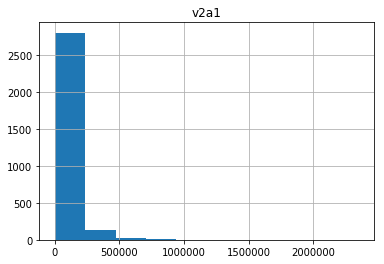

In [182]:
# check for data skew of v2a1, and fix it

print(classfier_input['v2a1'].describe().apply(lambda x: format(x, 'f')))
v2a1 = classfier_input['v2a1'].to_frame()
_  = v2a1.hist(bins = 10)

count    2973.000000
mean        3.200900
std         5.243638
min         0.000000
25%         0.000000
50%         0.000000
75%        10.596660
max        14.671405
Name: v2a1, dtype: object


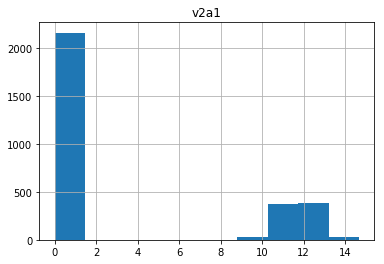

In [183]:
classfier_input['v2a1'] = classfier_input['v2a1'].apply(lambda x: np.log(x + 1))
print(classfier_input['v2a1'].describe().apply(lambda x: format(x, 'f')))
v2a1 = classfier_input['v2a1'].to_frame()
_  = v2a1.hist(bins = 10)

### Exploratory Visualization

Now that our features have been cleaned from abnormalities, missing values are fixed, and inidividual data aggregated to the household data, we can explore some of the relations\characteristics between various feature and the target, just to get an initial analysis of what might predict well our target

In [184]:
# TODO
# minMaxScaler on numerical features using:

#pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
#                      ('scaler', MinMaxScaler())])
# Fit and transform training data
#train_set = pipeline.fit_transform(train_set)
#test_set = pipeline.transform(test_set)